In [90]:
from __future__ import print_function
import time

import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

In [91]:
import json
import os
description_log_file = os.path.join(os.path.dirname(os.getcwd()), "log_dir/urma_3robot/policy_description.json")
# update the log file
with open(description_log_file, 'r') as f:
    log_data = json.load(f)

### dynamic_joint_description

In [101]:
import pandas as pd
import numpy as np

description_name = "dynamic_joint_description"
# description_name = "dynamic_joint_latent"

df_list = []

for dog_key, data_dict in log_data.items():
    # Extract the matrix
    matrix = np.array(data_dict[description_name])  # Ensure it's a NumPy array for easy handling

    # Get the numeric suffix from "GendogX"
    numeric_suffix = int(dog_key.replace("Gendog", ""))
    
    # Check if it's a 1D or 2D list
    if matrix.ndim == 1:  # 1D case
        num_features = matrix.shape[0]
        temp_df = pd.DataFrame([matrix])  # Convert single-row
        temp_df["name"] = dog_key
        temp_df["y_Gendog"] = numeric_suffix
        df_list.append(temp_df)

    elif matrix.ndim == 2:  # 2D case (m×n)
        num_joints, num_features = matrix.shape  # Get dimensions (e.g., 15x18)
        
        for joint_idx in range(num_joints):
            row_df = pd.DataFrame([matrix[joint_idx]])  # Each row as a DataFrame
            row_df["name"] = f"{dog_key}_joint{joint_idx}"  # Unique name
            row_df["y_Gendog"] = numeric_suffix  # Gendog number
            row_df["y_joint"] = joint_idx # joint number
            df_list.append(row_df)

# Concatenate all collected DataFrames
df = pd.concat(df_list, ignore_index=True)

In [102]:
value_column = range(num_features)
df_value = df[value_column]
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, max_iter=300)
tsne_results = tsne.fit_transform(df_value)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 4840 samples in 0.000s...
[t-SNE] Computed neighbors for 4840 samples in 0.096s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4840
[t-SNE] Computed conditional probabilities for sample 2000 / 4840
[t-SNE] Computed conditional probabilities for sample 3000 / 4840
[t-SNE] Computed conditional probabilities for sample 4000 / 4840
[t-SNE] Computed conditional probabilities for sample 4840 / 4840
[t-SNE] Mean sigma: 0.115729
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.447823
[t-SNE] KL divergence after 300 iterations: 1.367561
t-SNE done! Time elapsed: 1.4683563709259033 seconds


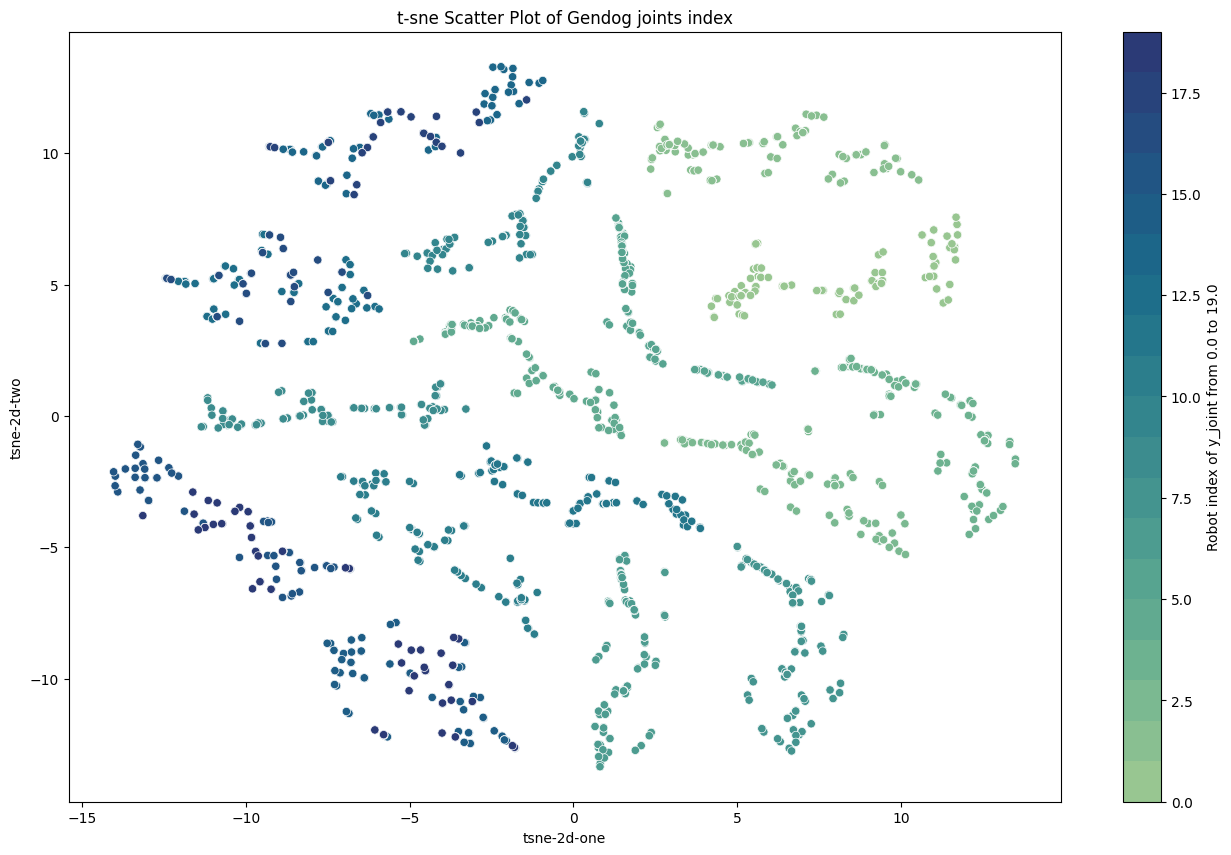

In [104]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np

# Make sure y is numeric
df["y_Gendog"] = df["y_Gendog"].astype(float)
df["y_joint"] = df["y_joint"].astype(float)

y_label = "y_joint"
min_y_label = min(df[y_label])
max_y_label = max(df[y_label])

# Create a discrete palette and convert it to a ListedColormap
discrete_palette = sns.color_palette("crest", int(max_y_label))
cmap = mcolors.ListedColormap(discrete_palette)
norm = plt.Normalize(vmin=min_y_label, vmax=max_y_label)

# 1) Create a figure and axes explicitly
fig, ax = plt.subplots(figsize=(16,10))

# 2) Plot using the created axes
scatter = sns.scatterplot(
    x="tsne-2d-one", 
    y="tsne-2d-two",
    hue=y_label,
    palette=cmap,
    hue_norm=(min_y_label, max_y_label),
    data=df,
    legend=False,   # Turn off the default Seaborn legend
    alpha=1,
    ax=ax           # Specify the axes here
)

# 3) Create a ScalarMappable for the colorbar
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])  # Needed for some matplotlib versions

# 4) Add the colorbar, telling it which axes to steal space from
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label(f"Robot index of {y_label} from {min_y_label} to {max_y_label}")

plt.title("t-sne Scatter Plot of Gendog joints index")
plt.show()


### dynamic_joint_latent

In [95]:
import pandas as pd
import numpy as np

description_name = "dynamic_joint_latent"

df_list = []

for dog_key, data_dict in log_data.items():
    # Extract the matrix
    matrix = np.array(data_dict[description_name])  # Ensure it's a NumPy array for easy handling

    # Get the numeric suffix from "GendogX"
    numeric_suffix = int(dog_key.replace("Gendog", ""))
    
    # Check if it's a 1D or 2D list
    if matrix.ndim == 1:  # 1D case
        num_features = matrix.shape[0]
        temp_df = pd.DataFrame([matrix])  # Convert single-row
        temp_df["name"] = dog_key
        temp_df["y_Gendog"] = numeric_suffix
        df_list.append(temp_df)

    elif matrix.ndim == 2:  # 2D case (m×n)
        num_joints, num_features = matrix.shape  # Get dimensions (e.g., 15x18)
        
        for joint_idx in range(num_joints):
            row_df = pd.DataFrame([matrix[joint_idx]])  # Each row as a DataFrame
            row_df["name"] = f"{dog_key}_joint{joint_idx}"  # Unique name
            row_df["y_Gendog"] = numeric_suffix  # Gendog number
            row_df["y_joint"] = joint_idx # joint number
            df_list.append(row_df)

# Concatenate all collected DataFrames
df = pd.concat(df_list, ignore_index=True)

In [96]:
value_column = range(num_features)
df_value = df[value_column]
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, max_iter=300)
tsne_results = tsne.fit_transform(df_value)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 308 samples in 0.001s...
[t-SNE] Computed neighbors for 308 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 308 / 308
[t-SNE] Mean sigma: 0.233153
[t-SNE] KL divergence after 250 iterations with early exaggeration: 43.818863
[t-SNE] KL divergence after 300 iterations: 0.316514
t-SNE done! Time elapsed: 0.19664907455444336 seconds


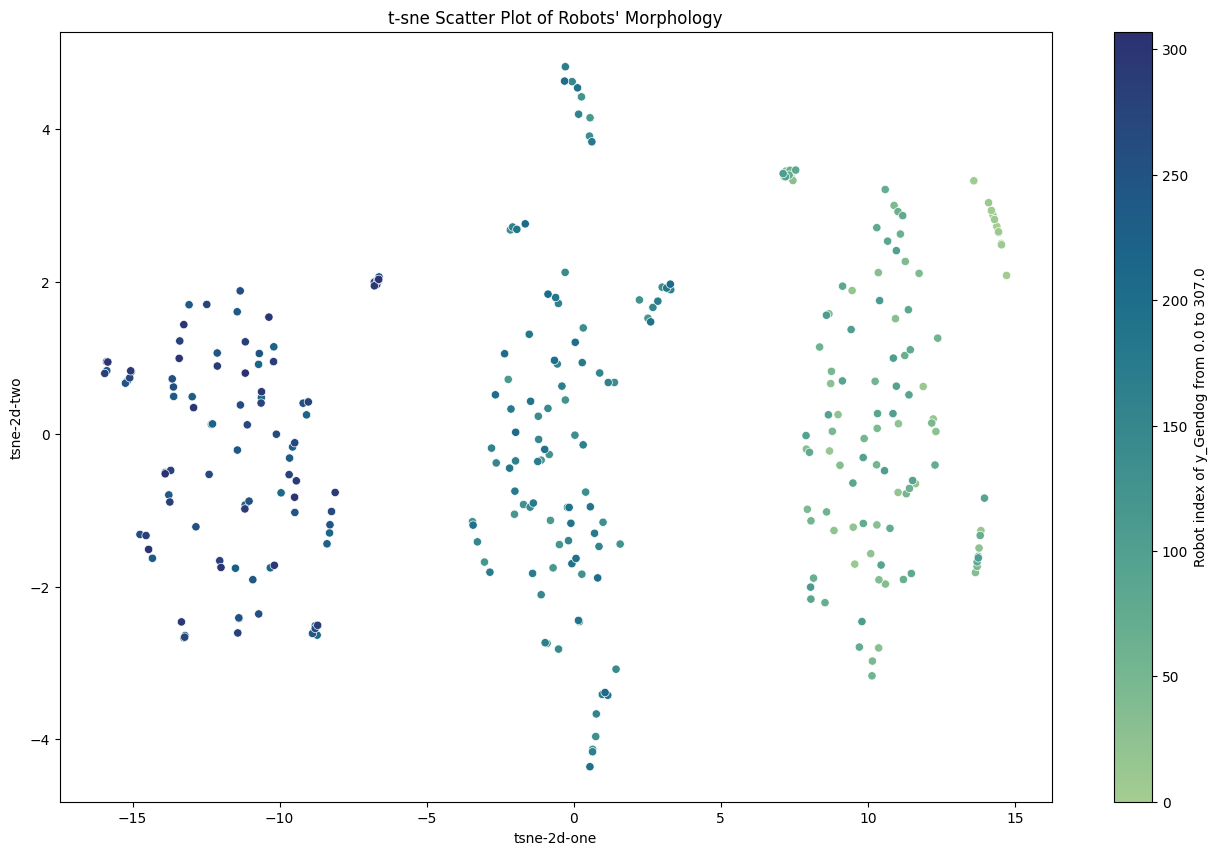

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np

# Make sure y is numeric
df["y_Gendog"] = df["y_Gendog"].astype(float)

y_label = "y_Gendog"
min_y_label = min(df[y_label])
max_y_label = max(df[y_label])

# Create a discrete palette and convert it to a ListedColormap
discrete_palette = sns.color_palette("crest", int(max_y_label))
cmap = mcolors.ListedColormap(discrete_palette)
norm = plt.Normalize(vmin=min_y_label, vmax=max_y_label)

# 1) Create a figure and axes explicitly
fig, ax = plt.subplots(figsize=(16,10))

# 2) Plot using the created axes
scatter = sns.scatterplot(
    x="tsne-2d-one", 
    y="tsne-2d-two",
    hue=y_label,
    palette=cmap,
    hue_norm=(min_y_label, max_y_label),
    data=df,
    legend=False,   # Turn off the default Seaborn legend
    alpha=1,
    ax=ax           # Specify the axes here
)

# 3) Create a ScalarMappable for the colorbar
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])  # Needed for some matplotlib versions

# 4) Add the colorbar, telling it which axes to steal space from
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label(f"Robot index of {y_label} from {min_y_label} to {max_y_label}")

plt.title("t-sne Scatter Plot of Gendog index")
plt.show()


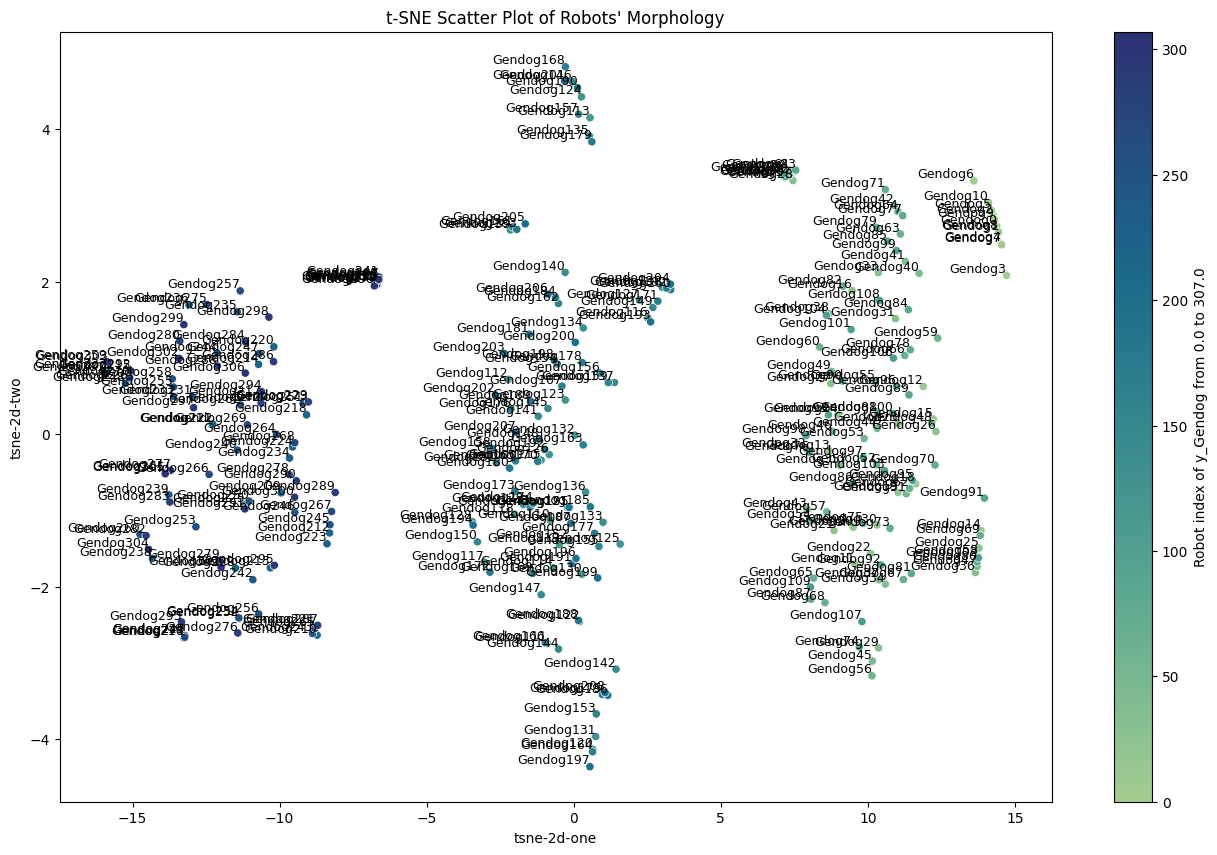

In [99]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np

# Ensure y is numeric
df["y_Gendog"] = df["y_Gendog"].astype(float)

y_label = "y_Gendog"
min_y_label = min(df[y_label])
max_y_label = max(df[y_label])

# Create a discrete palette and convert it to a ListedColormap
discrete_palette = sns.color_palette("crest", int(max_y_label))
cmap = mcolors.ListedColormap(discrete_palette)
norm = plt.Normalize(vmin=min_y_label, vmax=max_y_label)

# 1) Create a figure and axes explicitly
fig, ax = plt.subplots(figsize=(16, 10))

# 2) Plot using the created axes
scatter = sns.scatterplot(
    x="tsne-2d-one", 
    y="tsne-2d-two",
    hue=y_label,
    palette=cmap,
    hue_norm=(min_y_label, max_y_label),
    data=df,
    legend=False,   # Turn off the default Seaborn legend
    alpha=1,
    ax=ax           # Specify the axes here
)

# 3) Create a ScalarMappable for the colorbar
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])  # Needed for some matplotlib versions

# 4) Add the colorbar, telling it which axes to steal space from
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label(f"Robot index of {y_label} from {min_y_label} to {max_y_label}")

# 5) Annotate each point with its name
for i in range(len(df)):
    ax.text(
        df["tsne-2d-one"].iloc[i], 
        df["tsne-2d-two"].iloc[i], 
        df["name"].iloc[i], 
        fontsize=9, 
        ha='right', 
        va='bottom'
    )

plt.title("t-sne Scatter Plot of Gendog index")
plt.show()
